# Unit9 
## Activity: Fitting a linear regression line using intuitive visual approach.


This script allows you to interact with the figures and adjust the intercept and slope
of the line. 

Example data are taken from Collaborative Statistics Book Fig. 12.7:

**Third exams score and Final exams score**

In [1]:
# -*- coding: utf-8 -*-
"""

@author: Oliver Elison Timm

History:
2021-04-29 adjusted for hybrid class room activity
2019-04-26 updated to Python 3 Notebook version.
2016-02-27 first version

# just copied the example from the matplotlib 
# http://matplotlib.org/examples/widgets/slider_demo.html
# Full credits go to the matplotlib.prg team
# added the linear regression fitting
# problem
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider,Button, RadioButtons
from scipy.stats.distributions import norm
# we switch the appearance of matplotlib figures to interactive mode
%matplotlib notebook

In [2]:
##############################################################
# Grade scores for the third (x) and final exam (y)
##############################################################
x=np.array([ 65, 67, 71, 71, 66, 75, 67, 70, 71, 69, 69])
y=np.array([175,133,185,163,126,198,153,163,159,151,159])

# We center the data around their mean values
# for illustrative purposes
x=x-np.mean(x)
y=y-np.mean(y)
    

<IPython.core.display.Javascript object>


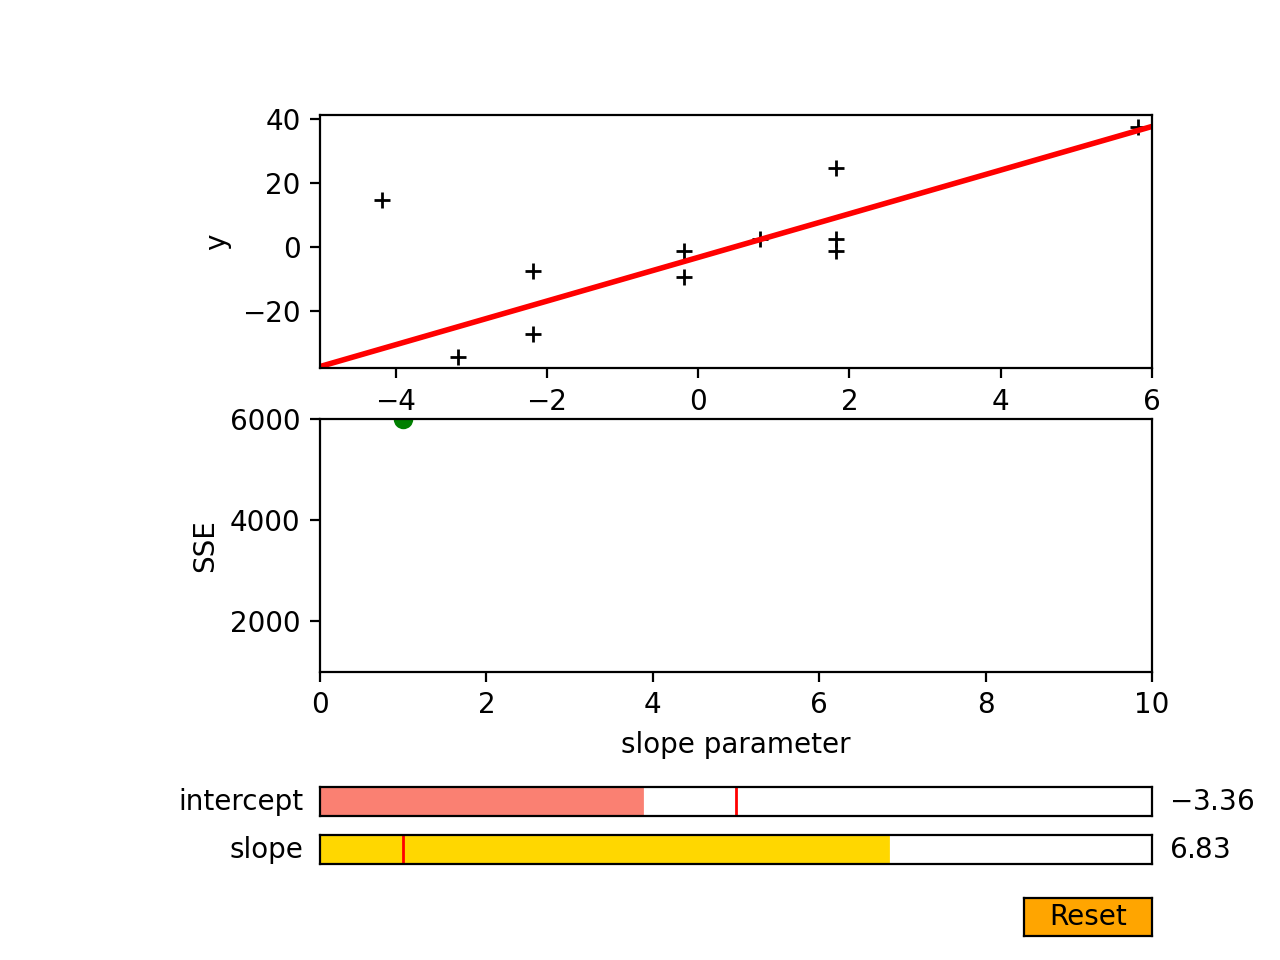

In [3]:
# need the min max range of the data to adjust sample spaces
# for the following linear regression analysis
xmin=int(np.min(x))-1
xmax=int(np.max(x))+1
ymin=int(np.min(y))-1
ymax=int(np.max(y))+1
x0=np.linspace(xmin,xmax,10)

# initial first guess regression line
default_slope=1
min_slope,max_slope=0,10

default_intercept=(ymin+ymax)/4
min_intercept,max_intercept = ymin/2,ymax/2
yfit0=default_slope*x0+default_intercept

xsse_default=default_slope # use slope as xcoordinate for SSE plot
ysse_default=6000


min_sse,max_sse = 1000, 6000


#############################################################
# INTERACTIVE WIDGETS: 
#
# Definition of call-back functions (actions that we take when the
# widgets report an interaction with the user)
#############################################################

def update(val):
    # get the value from the slider position
    """allows interaction with the sliders (via mouse), and
    it returns the slider's current value"""
    a=slda.val
    b=sldb.val
    yhelp=a+b*x0
    line.set_ydata(yhelp)
    # in this notebook we still hide the SSE value from students
    ysse=SSE(x,y,a=a,b=b) # inside we can use the x,y from outside !?
    pointsse.set_ydata(0)
    pointsse.set_xdata(0)
    # the line is updated (y-coordinates)
    fig.canvas.draw_idle() # update the plot 

def reset(event):
    """Set back the slider to the default values"""
    slda.reset()
    sldb.reset()
   
   


##################################################################
# preparing a figure with subplots()
# two objects are returned, a figure and an object for the axes
# The cool thing is, you can build step-by-step your plot!
##################################################################


fig,ax = plt.subplots(2,1)
# setting the plot area offset (30%) from the bottom left window corner
plt.subplots_adjust(left=0.25,bottom=0.30)
# coordinate system



##################################################################
# Python style! you can even form tuples (lists) with functions
# now I can call either the pdf or the cdf function via f[0],f[1]
# The reason why I do this is found below in the code in 
# function update().
# [PYLEVEL: advanced]
##################################################################



##################################################################
# PYLEV: advanced
# we create a line plot, the function returns the line-object
# so we can update it (change colors, change the data values etc)
# Note the syntax "line, ="! PYLEV: moderate
#################################################################

scatter, = ax[0].plot(x,y,'+',color='black')
line, =ax[0].plot(x0,yfit0,lw=2,color='red') 

ax[0].set_xlim([xmin,xmax])
ax[1].set_ylim([ymin,ymax])
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[1].set_ylim([min_sse,max_sse])
ax[1].set_xlim([min_slope,max_slope])
ax[1].set_xlabel("slope parameter")
ax[1].set_ylabel("SSE")
pointsse, = ax[1].plot(xsse_default,ysse_default,'o',color='green')

############################################################
# Each widget get's a new relative position in the window
# window coordinates left, bottom, right, top position 
# (all between 0 -1)
############################################################
# The control slider


axslope=plt.axes([0.25,0.1,0.65,0.03])
axintercept=plt.axes([0.25,0.15,0.65,0.03])

sldb=Slider(axslope,'slope',min_slope,max_slope,valinit=default_slope,color='gold')
slda=Slider(axintercept,'intercept',min_intercept,max_intercept,valinit=default_intercept,color='salmon')

# Reset Button 
resetax = plt.axes([0.8, 0.025, 0.1, 0.04]) # new relative axes for button

bttnreset=Button(resetax,'Reset',color="orange",hovercolor='red')
bttnreset.on_clicked(reset)   # reset button 




###############################################################
# Each widget has a 'listener function': It checks it the user
# has been interacting with the widgets.
###############################################################
slda.on_changed(update)    # slider for the mean
sldb.on_changed(update) # slider for the standard deviation


# last we show the interactive figure

plt.show()


# Why we don't need a main loop or something is not clear to me.
# somehow plt.show() must include this already.  
# But it works now in Jupyter notebooks.

References:

Programming of interactive graphs __is not__ part of the learning goals. But if you want to learn a bit more about the widget options you have in Python Notebooks here is a link to the official documentation.
    
- [Intereactive Notebooks with widgets](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20Basics.html)


## Task 1

Without changing the intercept, what is visually the best fitting line? Adjust the slope and estimate visually the line that intuitively fits best to the data.





6.83

## Task 2

Repeat the fitting of the linear line but now you are allowed to adjust both the slope and the intercept parameter.

Does it affect your slope value when you adjust the position of the line with the help of the intercept parameter? Report slope and intercept values for your best fittinf line.


No. intercept=-3.36, slope=6.83

## [Report the value in this shared spreadsheet table.](https://forms.office.com/Pages/ResponsePage.aspx?id=lCHStdUxP0eeHYBP3L2IrFE3EQ_0DQdIsh5uKdZiKG1UQVA5NENBUDMyWkZCWE1VOFo2UThIRkI4My4u)
